In [1]:
%matplotlib notebook
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Importing and managing data

In [4]:
data_wide = pd.read_csv('./surrogate_performance/benchmark_test_R^2.csv', index_col=0)
data_long=data_wide.unstack().reset_index()
data_long = data_long.rename(columns={"level_0":"Modelling Method", "level_1":"Filename", 0:"R2"})
data_wide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, DTLZ4_16_250_normal.csv to DTLZ4_6_2000_normal.csv
Data columns (total 13 columns):
svm_linear          2720 non-null float64
svm_rbf             2720 non-null float64
MLP                 2720 non-null float64
GPR_rbf             2720 non-null float64
GPR_matern3/2       2720 non-null float64
GPR_matern5/2       2720 non-null float64
DecisionTree        2720 non-null float64
RandomForest_10     2720 non-null float64
RandomForest_100    2720 non-null float64
AdaBoost_10         2720 non-null float64
AdaBoost_100        2720 non-null float64
ExtraTrees_10       2720 non-null float64
ExtraTrees_100      2720 non-null float64
dtypes: float64(13)
memory usage: 377.5+ KB


# Plotting R² Values for different modelling methods

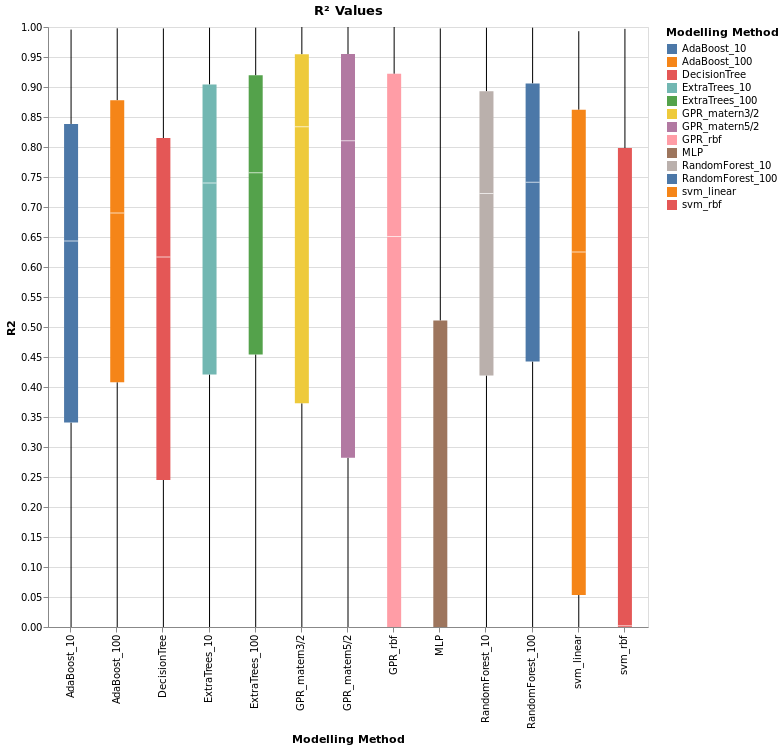

In [5]:
chart = alt.Chart(data_long, height=600, width=600, title='R² Values').mark_boxplot(clip=True).encode(x="Modelling Method", y=alt.Y("R2", scale=alt.Scale(domain=[-0,1])),color="Modelling Method")
chart

# Plotting Loss values

<IPython.core.display.Javascript object>


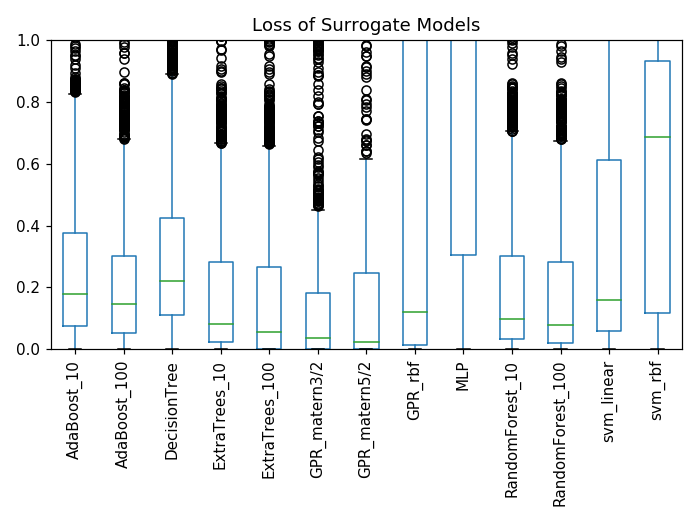

In [6]:
data_wide_loss = -data_wide.sub(data_wide.max(axis=1).values, axis=0)
data_wide_loss.sort_index(axis=1, inplace=True)
loss_chart = data_wide_loss.plot.box(rot=90)
loss_chart.set_title('Loss of Surrogate Models')
loss_chart.set_ylim([0,1])
plt.tight_layout()

# Plotting frequency of best model

<IPython.core.display.Javascript object>


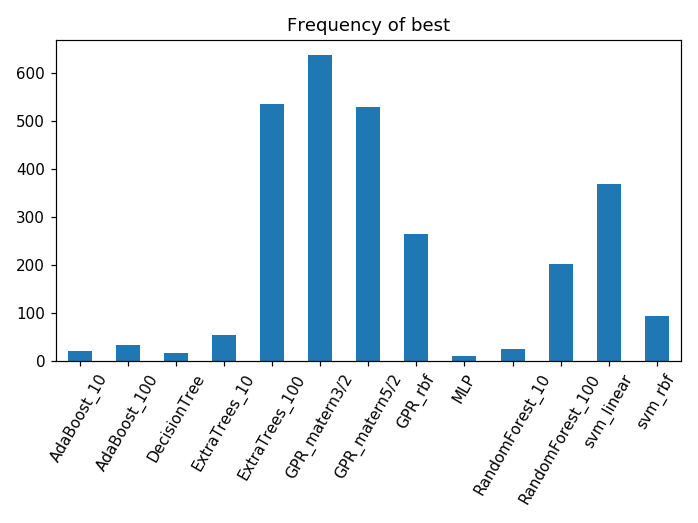

In [10]:
idmax = data_long.groupby(['Filename'])['R2'].transform(max) == data_long['R2']
data_long[idmax]['Modelling Method'].value_counts().sort_index().plot.bar(rot=60).set_title('Frequency of best')
data_long[idmax]['Modelling Method'].value_counts().sort_index()
plt.tight_layout()

# Plot of time for model fitting

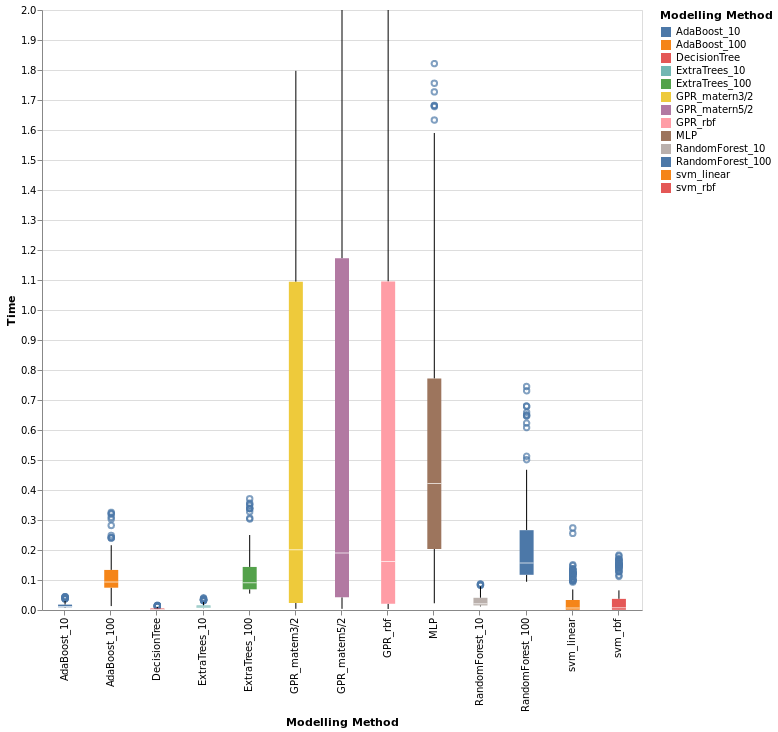

In [11]:
data_time =  pd.read_csv('./surrogate_performance/engineering_test_time.csv', index_col=0)
data_time=data_time.unstack().reset_index()
data_time = data_time.rename(columns={"level_0":"Modelling Method", "level_1":"Filename", 0:"Time"})
alt.Chart(data_time, height=600, width=600).mark_boxplot(clip=True).encode(x="Modelling Method", y=alt.Y("Time", scale=alt.Scale(domain=[0,2])),color="Modelling Method")